In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Load Image

In [2]:
img_path = '../output_videos/cropped_img.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

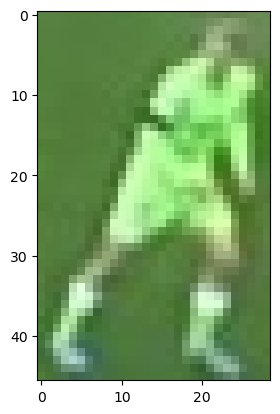

In [3]:
plt.imshow(img)

## Pre process image

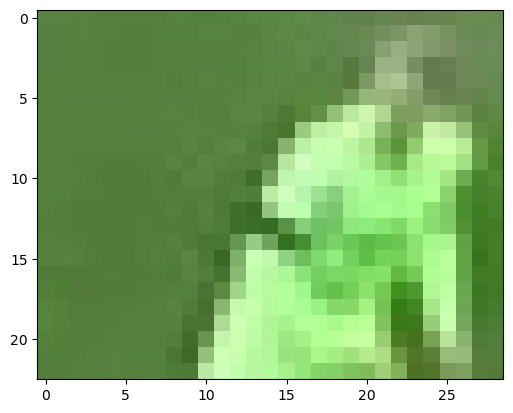

In [4]:
# take top half of image as we only need the shirt color
img_hlf = img[0:int(img.shape[0]/2),:]
plt.imshow(img_hlf)

## Cluster image into two clusters

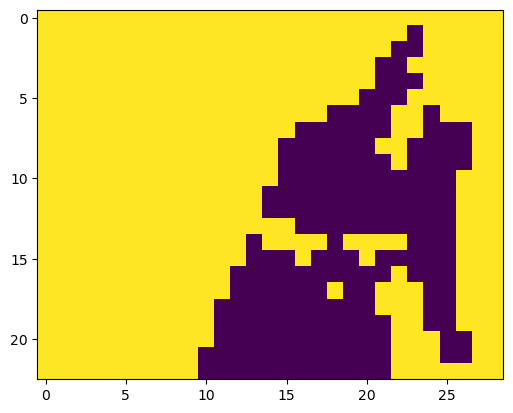

In [7]:
# Reshape the image into 2d Araay
img_2d = img_hlf.reshape(-1,3)

# Perfrom kmeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0).fit(img_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into original image shape
clustered_img = labels.reshape(img_hlf.shape[0],img_hlf.shape[1])

# Display clustered img
plt.imshow(clustered_img)

In [8]:
corner_clusters = [clustered_img[0,0],clustered_img[0,-1],clustered_img[-1,0],clustered_img[-1,-1]]
np_cluster = max(set(corner_clusters),key=corner_clusters.count)
np_cluster

1

In [9]:
player_cluster = 1-np_cluster
player_cluster

0

In [10]:
kmeans.cluster_centers_[player_cluster]

array([164.87113402, 229.28865979, 138.92783505])